# WeatherPy

## Analysis

 <ul>
    <li>It is noticeable that cities with higher temperature (more than 80F) mostly belong to (0,40) latitude range of the Northern Hemisphere.</li>       
    <li>There is no strong correlation between latitude and humidity. However, the majority of cities with humidity less than 40% belong to the Northern Hemisphere.</li>
    <li>There is no noticeable correlation between latitude and wind speed. The wind speed for the majority of cities is less than 15 mph.</li>
</ul>

In [1]:
import pandas as pd
import seaborn 
import json
import requests
import random
import time
from config import  wkey
from citipy import citipy
import matplotlib.pyplot as plt

In [2]:
#Latitude values are measured relative to the equator and range from -90° at the South Pole to +90° at the North Pole.
#Longitude values are measured relative to the prime meridian. 
#They range from -180° when traveling west to 180° when traveling east.
lat=[]
lng=[]
#create lists of 1700  random float values for latitude and longitude
while len(lat)<=1700:
    lat.append(random.uniform(-90.00, 0.00)) 
    lat.append(random.uniform(0.00, 90.00))
while len(lng)<=1700:
    lng.append(random.uniform(-180.00, 0))
    lng.append(random.uniform(0.00, 180.00))


In [3]:
#use citipy.nearest_city to find cities based on latitude and longitude
#as a result, cities is a list of the unique city names
cities=[]
for lt, ln in zip(lat, lng): 
    city=citipy.nearest_city(lt, ln)
    if city.city_name not in cities:
        cities.append(city.city_name)
print(f"We have {len(cities)} cities to retrieve from openweathermap.org")


We have 609 cities to retrieve from openweathermap.org


In [4]:
#API call:
url = "http://api.openweathermap.org/data/2.5/weather"
query_params = {
    'appid': wkey,
    'units': 'imperial'
}
not_found=0

#create an empty DataFrame to store  cities data
city_weather=pd.DataFrame(columns=["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"])
index=0

#loop through each item in cities to perform API calls:

for i in range(len(cities)):
    #include print log of each city as it's being processed with the city number
    print(f'Retrieving Results for City {i}: {cities[i]}')
   
    try:
        query_params['q']=cities[i]
        response=requests.get(url, params=query_params)
        city_info=response.json()
        
        #print the city name and requested URL.
        print(f'URL: {response.url}')
        
        #add city data to city_info DataFrame
        city_weather.loc[index, 'City']=city_info["name"]
        city_weather.loc[index, 'Cloudiness']=city_info["clouds"]["all"]
        city_weather.loc[index, 'Country']=city_info["sys"]["country"]
        city_weather.loc[index, 'Date']=city_info["dt"]
        city_weather.loc[index, 'Humidity']=city_info["main"]["humidity"]
        city_weather.loc[index, 'Lat']=city_info["coord"]["lat"]
        city_weather.loc[index, 'Lng']=city_info["coord"]["lon"]
        city_weather.loc[index, 'Max Temp']=city_info["main"]["temp_max"]
        city_weather.loc[index, 'Wind Speed']=city_info["wind"]["speed"]
        
        index+=1
    #exception in case city data was not returned by API call
    except KeyError:
        print("Data is not found...Skipping...")
        not_found+=1
print("------------")
print('Data Retrieval Complete.')
print(f'Data for {not_found} cities is unavailable.')
print("------------")
city_weather.to_csv("output.csv")
print("Retrieved cities data is stored in output.csv")

Retrieving Results for City 0: carauari
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=carauari
Retrieving Results for City 1: impfondo
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=impfondo
Retrieving Results for City 2: ushuaia
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=ushuaia
Retrieving Results for City 3: balaguer
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=balaguer
Retrieving Results for City 4: punta arenas
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=punta+arenas
Retrieving Results for City 5: ostrovnoy
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=ostrovnoy
Retrieving Results for City 6: rikitea
URL: http:/

URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=meulaboh
Retrieving Results for City 53: pisco
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=pisco
Retrieving Results for City 54: doha
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=doha
Retrieving Results for City 55: jiuquan
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=jiuquan
Retrieving Results for City 56: gannan
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=gannan
Retrieving Results for City 57: tir pol
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=tir+pol
Data is not found...Skipping...
Retrieving Results for City 58: cherskiy
URL: http://api.openweathermap.org/data/2.

URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=kirs
Retrieving Results for City 104: saskylakh
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=saskylakh
Retrieving Results for City 105: chicama
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=chicama
Retrieving Results for City 106: hasaki
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=hasaki
Retrieving Results for City 107: belushya guba
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=belushya+guba
Data is not found...Skipping...
Retrieving Results for City 108: wokha
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=wokha
Retrieving Results for City 109: okhotsk
URL: http://api.ope

URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=atasu
Retrieving Results for City 154: hermanus
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=hermanus
Retrieving Results for City 155: polunochnoye
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=polunochnoye
Retrieving Results for City 156: taltal
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=taltal
Retrieving Results for City 157: batticaloa
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=batticaloa
Retrieving Results for City 158: tuy hoa
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=tuy+hoa
Retrieving Results for City 159: gazanjyk
URL: http://api.openweathermap.org/data/2.5

URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=khani
Retrieving Results for City 206: kidal
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=kidal
Retrieving Results for City 207: beringovskiy
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=beringovskiy
Retrieving Results for City 208: turayf
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=turayf
Retrieving Results for City 209: kavieng
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=kavieng
Retrieving Results for City 210: pak thong chai
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=pak+thong+chai
Retrieving Results for City 211: necochea
URL: http://api.openweathermap.org/data/2

URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=krasnooktyabrskiy
Retrieving Results for City 256: turbat
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=turbat
Retrieving Results for City 257: dalbandin
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=dalbandin
Retrieving Results for City 258: molina
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=molina
Retrieving Results for City 259: benghazi
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=benghazi
Retrieving Results for City 260: urozhaynoye
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=urozhaynoye
Retrieving Results for City 261: yaita
URL: http://api.openweathermap.org/data/

URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=nago
Retrieving Results for City 307: lebedinyy
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=lebedinyy
Retrieving Results for City 308: bom jesus da lapa
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=bom+jesus+da+lapa
Retrieving Results for City 309: hambantota
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=hambantota
Retrieving Results for City 310: talnakh
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=talnakh
Retrieving Results for City 311: phuket
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=phuket
Retrieving Results for City 312: sentyabrskiy
URL: http://api.openweatherm

URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=vila+velha
Retrieving Results for City 358: maloshuyka
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=maloshuyka
Data is not found...Skipping...
Retrieving Results for City 359: odweyne
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=odweyne
Data is not found...Skipping...
Retrieving Results for City 360: doos
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=doos
Retrieving Results for City 361: zeya
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=zeya
Retrieving Results for City 362: adamovka
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=adamovka
Retrieving Results for City 363: hue

URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=guarapari
Retrieving Results for City 411: pandan
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=pandan
Retrieving Results for City 412: salinas
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=salinas
Retrieving Results for City 413: aflu
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=aflu
Data is not found...Skipping...
Retrieving Results for City 414: barbar
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=barbar
Data is not found...Skipping...
Retrieving Results for City 415: riyadh
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=riyadh
Retrieving Results for City 416: santa luzia


URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=zalesovo
Retrieving Results for City 462: ajdabiya
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=ajdabiya
Retrieving Results for City 463: pithiviers
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=pithiviers
Retrieving Results for City 464: jutai
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=jutai
Retrieving Results for City 465: krabi
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=krabi
Retrieving Results for City 466: mahon
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=mahon
Retrieving Results for City 467: nanzhou
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe

URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=kjollefjord
Retrieving Results for City 512: coihaique
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=coihaique
Retrieving Results for City 513: sillamae
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=sillamae
Retrieving Results for City 514: abha
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=abha
Retrieving Results for City 515: karamay
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=karamay
Data is not found...Skipping...
Retrieving Results for City 516: perumpavur
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=perumpavur
Retrieving Results for City 517: darnah
URL: http://api.o

URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=panzhihua
Retrieving Results for City 563: ishigaki
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=ishigaki
Retrieving Results for City 564: villarrica
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=villarrica
Retrieving Results for City 565: ronne
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=ronne
Retrieving Results for City 566: vanimo
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=vanimo
Retrieving Results for City 567: haradok
URL: http://api.openweathermap.org/data/2.5/weather?appid=7fe071649c7a7cf58485c25164ba9e51&units=imperial&q=haradok
Retrieving Results for City 568: sakakah
URL: http://api.openweathermap.org/data/2.5/weather?ap

In [5]:
city_weather.count()

City          537
Cloudiness    537
Country       537
Date          537
Humidity      537
Lat           537
Lng           537
Max Temp      537
Wind Speed    537
dtype: int64

In [6]:
city_weather.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Carauari,24,BR,1529374222,83,-4.88,-66.9,73.71,4.41
1,Impfondo,92,CD,1529374222,100,1.62,18.06,69.48,2.28
2,Ushuaia,40,AR,1529373600,94,-54.81,-68.31,35.6,10.29
3,Balaguer,0,ES,1529374223,72,41.79,0.81,55.8,2.95
4,Punta Arenas,75,CL,1529370000,100,-53.16,-70.91,35.6,19.46
5,Ostrovnoy,80,RU,1529374223,81,68.05,39.51,58.05,15.93
6,Rikitea,92,PF,1529373464,100,-23.12,-134.97,72.45,19.62
7,Ginir,0,ET,1529374224,84,7.14,40.71,56.79,4.85
8,Cidreira,0,BR,1529373226,89,-30.17,-50.22,48.6,7.76
9,Tessalit,0,ML,1529374224,14,20.2,1.01,88.47,11.01


## Latitude vs Temperature(F) Plot

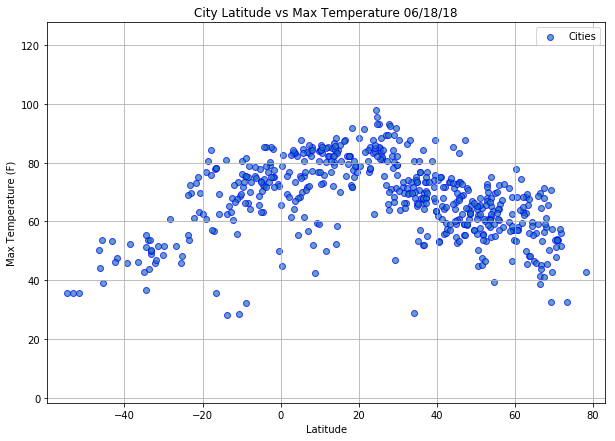

In [7]:
fig = plt.figure(figsize=(10, 7))
plt.scatter(city_weather["Lat"], city_weather["Max Temp"], marker="o", alpha=0.7, edgecolor="b", label="Cities", linewidth=1)
plt.title(f"City Latitude vs Max Temperature {time.strftime('%x')}")
max_t=city_weather["Max Temp"].max()
min_t=city_weather["Max Temp"].min()
max_l=city_weather["Lat"].max()
min_l=city_weather["Lat"].min()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(min_l-5,max_l+5)
plt.ylim(min_t-30,max_t+30)
plt.legend(loc="best")
plt.grid()
plt.savefig("City_Latitude_vs_Max_Temperature.png", dpi = 100)
plt.show()

## Latitude vs Humidity (%) Plot

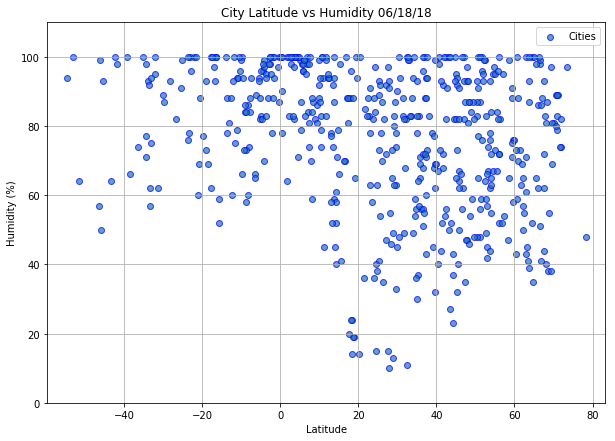

In [8]:
fig = plt.figure(figsize=(10, 7))
plt.scatter(city_weather["Lat"], city_weather["Humidity"], marker="o", alpha=0.7, edgecolor="b", label="Cities")
plt.title(f"City Latitude vs Humidity {time.strftime('%x')}")
max_l=city_weather["Lat"].max()
min_l=city_weather["Lat"].min()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(min_l-5,max_l+5)
plt.ylim(0,110)
plt.legend(loc="best")
plt.grid()
plt.savefig("City_Latitude_vs_Humidity.png", dpi = 100)
plt.show()

## Latitude vs Cloudiness (%) Plot

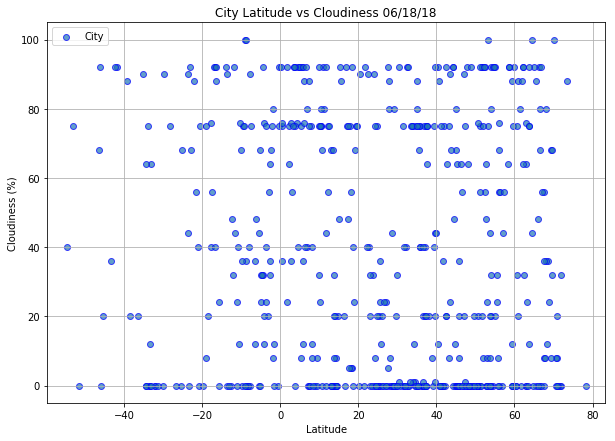

In [9]:
fig = plt.figure(figsize=(10, 7))
plt.scatter(city_weather["Lat"], city_weather["Cloudiness"], marker="o", alpha=0.7, edgecolor="b", label="City")
plt.title(f"City Latitude vs Cloudiness {time.strftime('%x')}")
max_l=city_weather["Lat"].max()
min_l=city_weather["Lat"].min()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(min_l-5,max_l+5)
plt.ylim(-5,105)
plt.legend(loc="best")
plt.grid()
plt.savefig("City_Latitude_vs_Cloudiness.png", dpi = 100)
plt.show()

## Latitude vs Wind Speed (mph) Plot

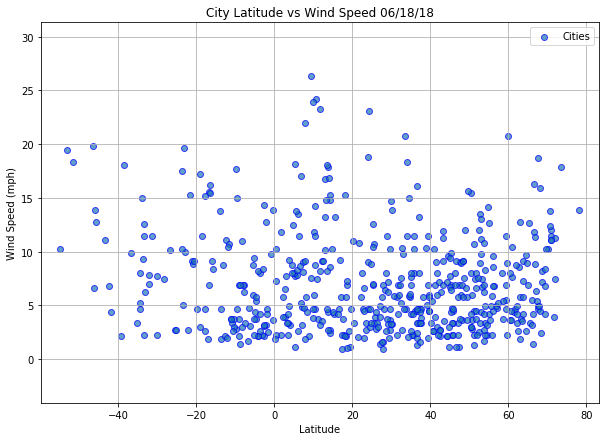

In [10]:
fig = plt.figure(figsize=(10, 7))
plt.scatter(city_weather["Lat"], city_weather["Wind Speed"], marker="o", alpha=0.7, edgecolor="b", label="Cities")
plt.title(f"City Latitude vs Wind Speed {time.strftime('%x')}")
max_l=city_weather["Lat"].max()
min_l=city_weather["Lat"].min()
max_s=city_weather["Wind Speed"].max()
min_s=city_weather["Wind Speed"].min()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(min_l-5,max_l+5)
plt.ylim(min_s-5,max_s+5)
plt.legend(loc="best")
plt.grid()
plt.savefig("City_Latitude_vs_Wind_Speed.png", dpi = 100)
plt.show()